# Enseval Demand Forecasting - Exploratory Data Analysis (EDA)


Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

## Raw file processing

In [1]:
import os
import openpyxl
import numpy as np
import pandas as pd
import seaborn as ns
import matplotlib.pyplot as plt

file_path = 'D:/Enseval/Sales Files'

In [2]:
total = 0
for item in os.listdir(file_path):
    if item.startswith('OF'):
        print('FILE NAME : ', item)
        df = pd.read_excel(file_path + '/' + item)
        df = df.sort_values(by = ['ITEM_CODE'])
        print('\nFILE INFO : ')
        print(df.info())
        print('\nNULL DATA : ', )
        print(df.isnull().sum())
        print('\nUNIQUE PRODUCT VALUES : ', df['ITEM_CODE'].unique())
        print('\nBRANCH CODES : ', df['BRANCH_CODE'].unique())
        print('\nMIN DATE : ', min(df['SO_DATE']))
        print('MAX DATE : ', max(df['SO_DATE'])) 
        print('─' * 175)
        total += int(df['ITEM_CODE'].count())
        # break
        
print('\nConsolidated total rows count : ', total)

FILE NAME :  OF 2020.xlsx

FILE INFO : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174227 entries, 162190 to 83076
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   BRANCH_CODE         174227 non-null  object        
 1   SO_DATE             174227 non-null  datetime64[ns]
 2   ITEM_CODE           174227 non-null  object        
 3   QUANTITY_PESAN      174227 non-null  int64         
 4   QUANTITY_FULFILLED  174227 non-null  int64         
 5   CANCELREASON        174227 non-null  object        
 6   CANCELMEANING       174227 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 10.6+ MB
None

NULL DATA : 
BRANCH_CODE           0
SO_DATE               0
ITEM_CODE             0
QUANTITY_PESAN        0
QUANTITY_FULFILLED    0
CANCELREASON          0
CANCELMEANING         0
dtype: int64

UNIQUE PRODUCT VALUES :  ['BMTLB' 'CBPCA' 'CKPXB' 'HCO01' 'ICF

# Concatinating files

In [3]:
# Concatinating files
df_raw = pd.concat([pd.read_excel(file_path + '/' + f) for f in os.listdir(file_path) if f.startswith('OF')])
print('Concatinated file count : ', df_raw.shape)

# df_raw.to_csv('D:/combained_file.csv', index = False)

Concatinated file count :  (374340, 7)


In [4]:
df2 = np.unique(df[['CANCELREASON', 'CANCELMEANING']])

print(df2)

['-' 'IR_ISO_CMS_CHG' 'Internal requisition initiated change' 'SL1.1'
 'SL1.1 OOS ( Out of Stock )' 'SL1.2' 'SL1.2 OOS PO Berulang' 'SL10'
 'SL10 Cancel Otomatis' 'SL3.1'
 'SL3.1 Salah harga atau discount karena tidak ada surat dari principal'
 'SL3.2' 'SL3.2 Salah harga karena outlet belum mengubah harga lama'
 'SL3.3' 'SL3.3 Salah harga karena lebih rendah dari harga e-Catalog'
 'SL4' 'SL4 Piutang overdue dan credit limit' 'SL5.1'
 'SL5.1 Ditolak outlet karena PO alokasi pusat' 'SL5.2'
 'SL5.2 Ditolak outlet karena ED tidak sesuai kriteria' 'SL6.1'
 'SL6.1 PO tidak disetujui principal (over quota/budget promo)' 'SL6.2'
 'SL6.2 PO expired - outlet stock opname' 'SL6.3'
 'SL6.3 PO expired - PO terbit di luar schedule' 'SL6.4'
 'SL6.4 PO dari outlet salah vendor' 'SL8'
 'SL8   Koreksi ship to,qty,item & kode salur' 'SL9.1'
 'SL9.1 Outlet tidak ada SITO/SIKTTK' 'SL9.2'
 'SL9.2 Outlet tidak bisa memberikan SP' 'SYSTEM' 'System Change']


# Visualization of Time Series

BDL (Branch) X CKPXB (Item)

Total no of rows in -  BDL (Branch) X CKPXB (Item)  =  1094
No of data presented dates :  777
No of data missing dates :  13


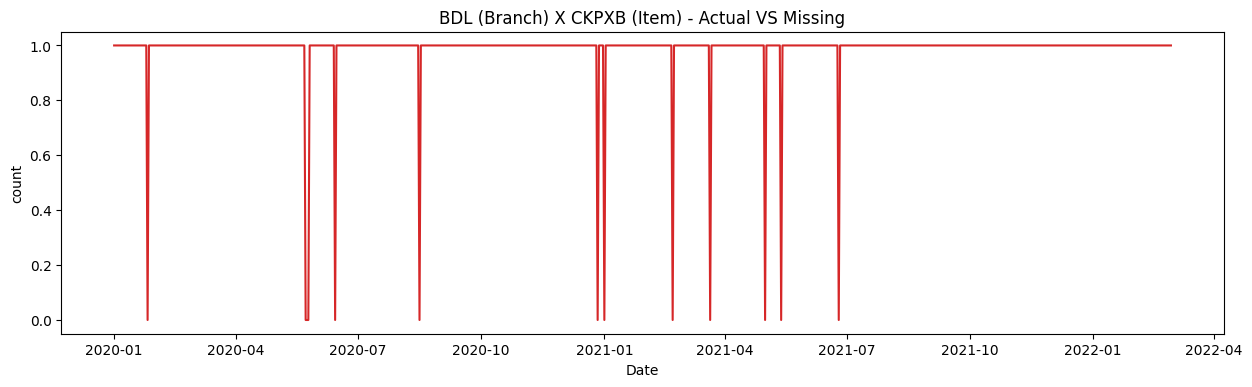

BDL (Branch) X VSVFA (Item)

Total no of rows in -  BDL (Branch) X VSVFA (Item)  =  433
No of data presented dates :  408
No of data missing dates :  382


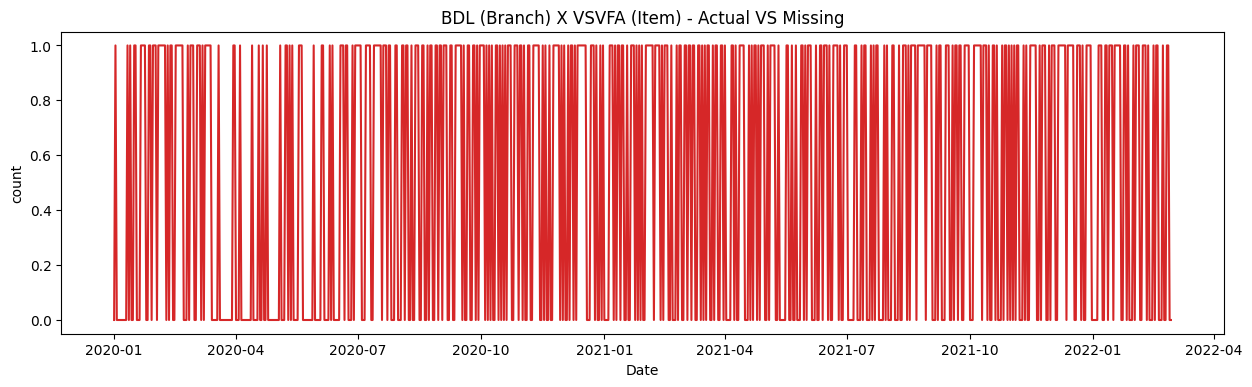

In [5]:
def plot_df(x, y, title="", xlabel='Date', ylabel=None, dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    # plt.grid(True)
    plt.show()

branches = df_raw['BRANCH_CODE'].unique()
items = df_raw['ITEM_CODE'].unique()

for branch in branches:
    if branch in ('BDL'):
        df = df_raw[df_raw['BRANCH_CODE'] == branch]
        for item in items:
            if item in ('CKPXB','VSVFA'):
                new_df = df[df['ITEM_CODE'] == item]
                new_df = new_df.sort_values(by = ['SO_DATE'])
                title = branch+' (Branch) X '+item+' (Item)'
                print(title)
                print('\nTotal no of rows in - ', title ,' = ', new_df['SO_DATE'].count())
                print('No of data presented dates : ', len(new_df['SO_DATE'].unique()))
                df_n1 = new_df.set_index('SO_DATE')
                df_n1.index = pd.to_datetime(df_n1.index)
                li = pd.date_range(start="2020-01-01", end="2022-02-28").difference(df_n1.index)
                print('No of data missing dates : ', len(li))
                
                ex = [{'date' : item, 'count' : int(1)} for item in new_df['SO_DATE'].unique()]
                new = [ex.append({'date' : item, 'count' : int(0)}) for item in li]

                df_n = pd.DataFrame(ex)
                df_n = df_n.sort_values(by = ['date'])
                plot_df(x = df_n['date'], y = df_n['count'], title = title + ' - Actual VS Missing', ylabel = 'count')
                
                # plot_df(x = new_df['SO_DATE'], y = new_df['QUANTITY_FULFILLED'], title = title + ' - Actual sale Data', ylabel = 'Quantity Fulfilled')
                
                # break
        # break

# Missing no of dates in heatmap

[Text(0.5, 114.0, 'Items'), Text(159.0, 0.5, 'Branches')]

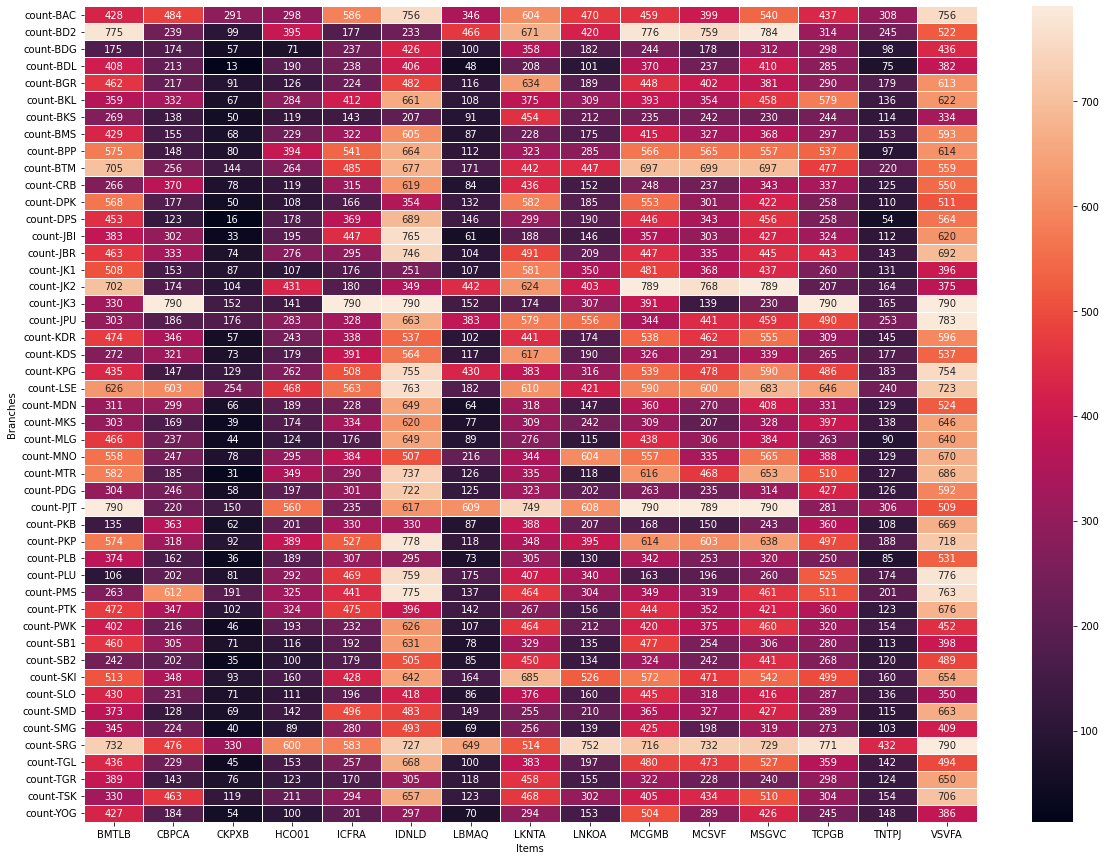

In [6]:
branches = df_raw['BRANCH_CODE'].unique()
items = df_raw['ITEM_CODE'].unique()

kk = []

for branch in branches:
    df = df_raw[df_raw['BRANCH_CODE'] == branch]
    for item in items:
        new_df = df[df['ITEM_CODE'] == item]
        new_df = new_df.sort_values(by = ['SO_DATE'])
        df_n1 = new_df.set_index('SO_DATE')
        df_n1.index = pd.to_datetime(df_n1.index)
        li = pd.date_range(start="2020-01-01", end="2022-02-28").difference(df_n1.index)
        
        ex = [{'date' : item, 'count' : int(1)} for item in new_df['SO_DATE'].unique()]
        new = [ex.append({'date' : item, 'count' : int(0)}) for item in li]

        df_n = pd.DataFrame(ex)
        df_n = df_n.sort_values(by = ['date'])
        d = {'item' : item, 'branch' : branch, 'count': int(len(li))}
        kk.append(d)

ff = pd.DataFrame(kk)
df_pivot = ff.pivot(index='item',columns=['branch'], values=['count'])
df_pivot = df_pivot.T

plt.figure(figsize = (20,15))
ax = ns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Items', ylabel='Branches')

# df_pivot.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

[Text(0.5, -12.0, 'Items'), Text(159.0, 0.5, 'Branches')]

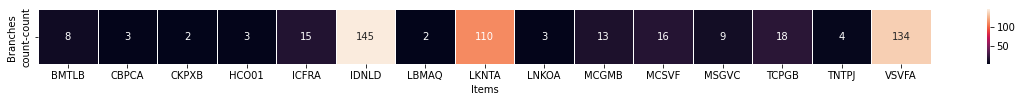

In [7]:
branches = df_raw['BRANCH_CODE'].unique()
items = df_raw['ITEM_CODE'].unique()

df = df_raw

kk = []

# for branch in branches:
#     df = df_raw[df_raw['BRANCH_CODE'] == branch]
for item in items:
    new_df = df[df['ITEM_CODE'] == item]
    new_df = new_df.sort_values(by = ['SO_DATE'])
    df_n1 = new_df.set_index('SO_DATE')
    df_n1.index = pd.to_datetime(df_n1.index)
    li = pd.date_range(start="2020-01-01", end="2022-02-28").difference(df_n1.index)
    
    ex = [{'date' : item, 'count' : int(1)} for item in new_df['SO_DATE'].unique()]
    new = [ex.append({'date' : item, 'count' : int(0)}) for item in li]

    df_n = pd.DataFrame(ex)
    df_n = df_n.sort_values(by = ['date'])
    d = {'item' : item, 'branch' : 'count', 'count': int(len(li))}
    kk.append(d)

ff = pd.DataFrame(kk)
df_pivot = ff.pivot(index='item',columns=['branch'], values=['count'])
df_pivot = df_pivot.T

plt.figure(figsize = (20,1))
ax = ns.heatmap(df_pivot, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Items', ylabel='Branches')

# df_pivot.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

# Decomposition - Seasonality

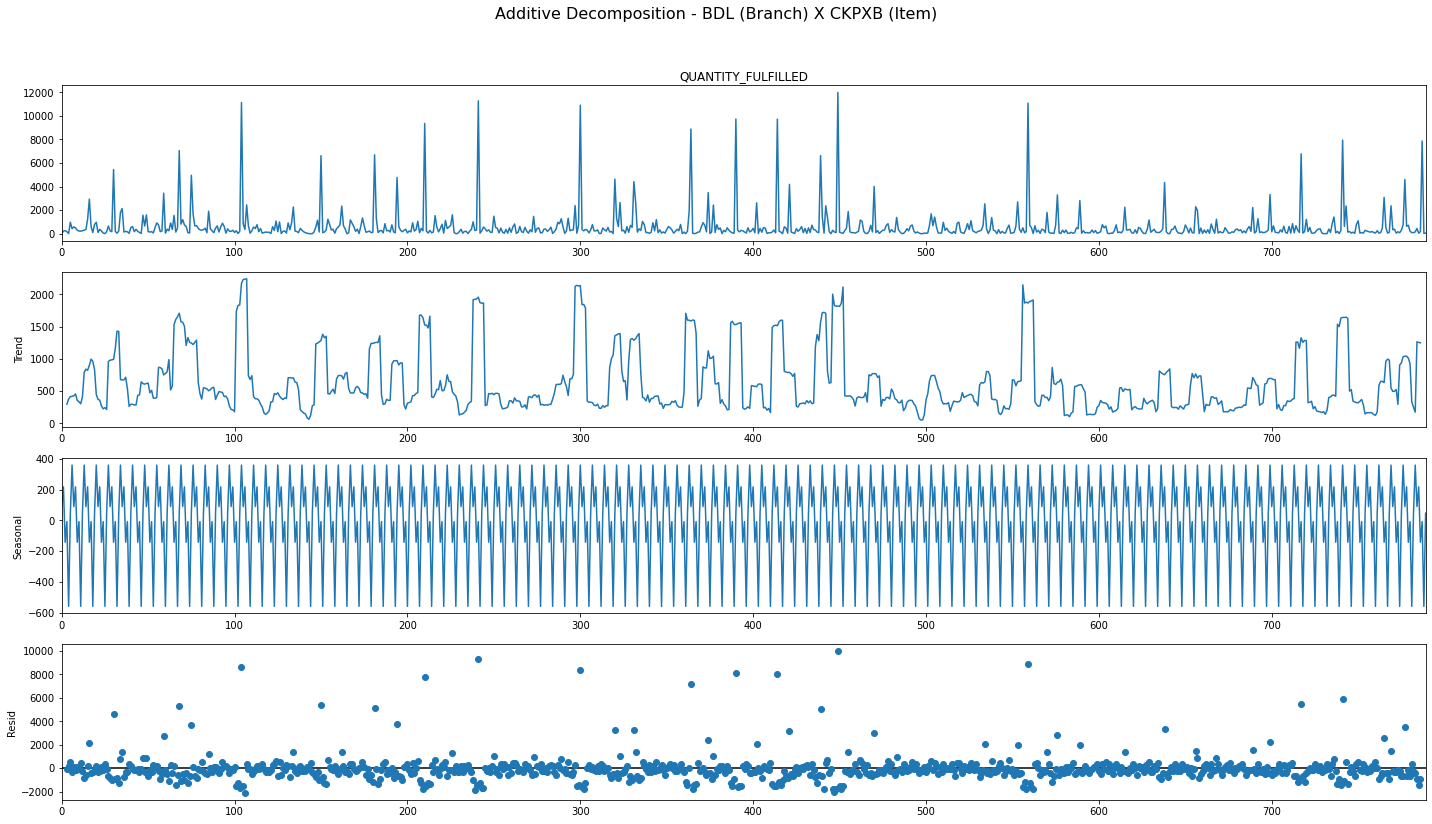

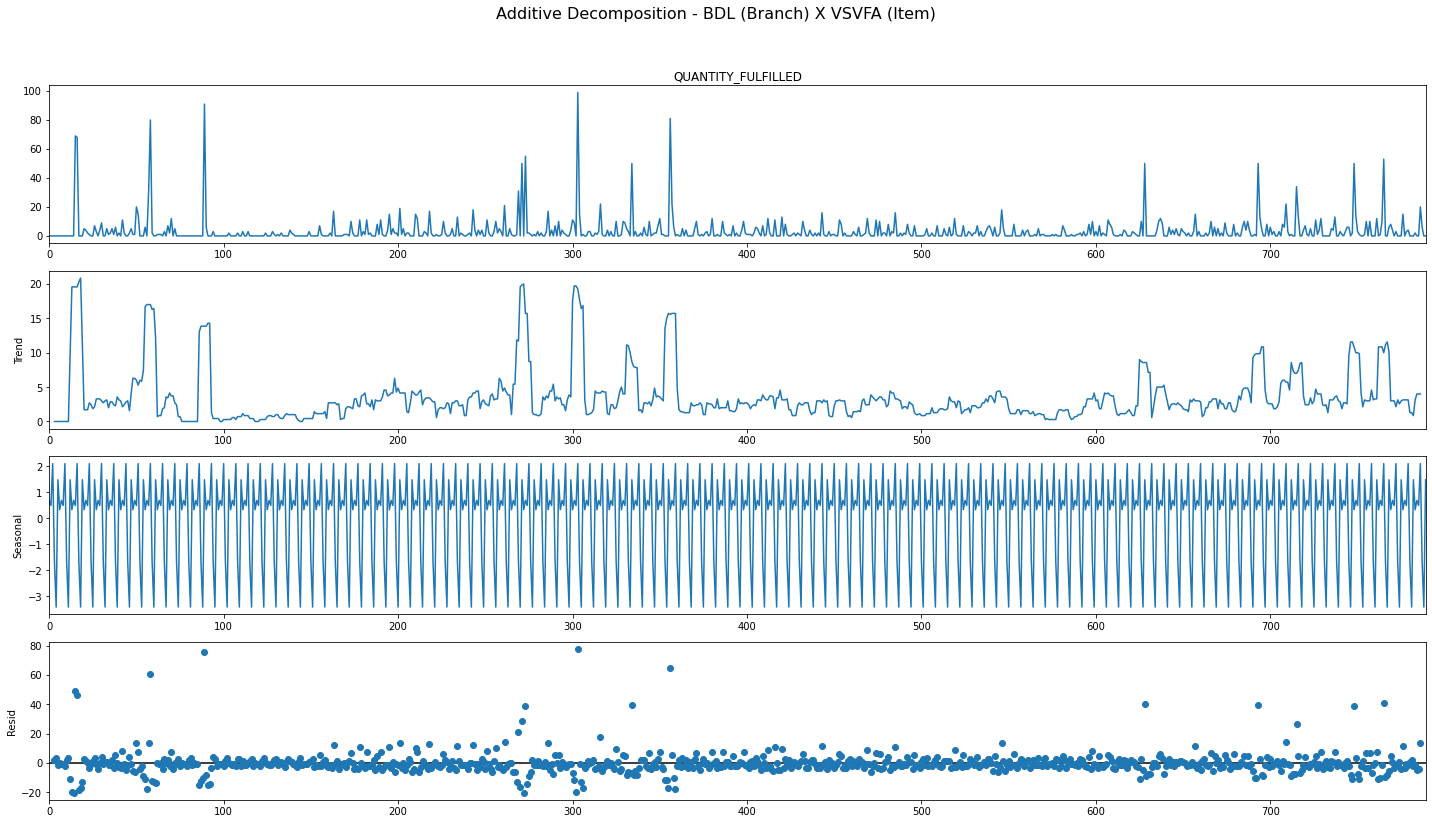

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

branches = df_raw['BRANCH_CODE'].unique()
items = df_raw['ITEM_CODE'].unique()

df_raw = df_raw[['BRANCH_CODE', 'SO_DATE', 'ITEM_CODE','QUANTITY_FULFILLED']]
for branch in branches:
    if branch in ('BDL'):
        df = df_raw[df_raw['BRANCH_CODE'] == branch]
        for item in items:
            if item in ('CKPXB','VSVFA'):
                
                title = branch+' (Branch) X '+item+' (Item)'
                new_df = df[df['ITEM_CODE'] == item]
                new_df = new_df.sort_values(by = ['SO_DATE'])
                
                df_n1 = new_df.set_index('SO_DATE')
                df_n1.index = pd.to_datetime(df_n1.index)
                li = pd.date_range(start="2020-01-01", end="2022-02-28").difference(df_n1.index)
                
                df_n1 = (df_n1.groupby(['BRANCH_CODE', 'ITEM_CODE', 'SO_DATE'])['QUANTITY_FULFILLED'].agg('sum').reset_index())
                ex = df_n1.to_dict('records')
                new = [ex.append({'BRANCH_CODE': branch, 'ITEM_CODE' : item,'SO_DATE' : date, 'QUANTITY_FULFILLED' : int(0)}) for date in li]

                df_n = pd.DataFrame(ex)
                df_n = df_n.sort_values(by = ['SO_DATE'])
                df_n.reset_index(drop=True, inplace=True)
                
                # plot_df(x = df_n['SO_DATE'], y = df_n['QUANTITY_FULFILLED'], title = title + ' - Actual sale Data', ylabel = 'Quantity Fulfilled')
                
                ex = [{'date' : item, 'count' : int(1)} for item in new_df['SO_DATE'].unique()]
                new = [ex.append({'date' : item, 'count' : int(0)}) for item in li]

                df_n2 = pd.DataFrame(ex)
                df_n2 = df_n2.sort_values(by = ['date'])
                # plot_df(x = df_n2['date'], y = df_n2['count'], title = title + ' - Actual VS Missing', ylabel = 'count')

                # Additive Decomposition
                additive_decomposition = seasonal_decompose(df_n['QUANTITY_FULFILLED'], model='additive', period=7)
                plt.rcParams.update({'figure.figsize': (20,12)})
                additive_decomposition.plot().suptitle('Additive Decomposition - '+ title, fontsize=16)
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                # Multiplicative Decomposition
                # multiplicative_decomposition = seasonal_decompose(df_n['QUANTITY_FULFILLED'], model='multiplicative', period=30)
                # plt.rcParams.update({'figure.figsize': (16,12)})
                # multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
                # plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                
                plt.show()

# Pivot Processing QUANTITY_FULFILLED

In [24]:
df_fulfilled = df_raw[['BRANCH_CODE', 'SO_DATE', 'ITEM_CODE','QUANTITY_FULFILLED']]

df_n1 = df_fulfilled.set_index('SO_DATE')
df_n1.index = pd.to_datetime(df_n1.index)
li = pd.date_range(start="2020-01-01", end="2022-02-28").difference(df_n1.index)
print(li)

df_fulfilled['timestamp'] = df_fulfilled['SO_DATE'].dt.date

df_clean = (df_fulfilled.groupby(['BRANCH_CODE', 'ITEM_CODE', 'timestamp'])['QUANTITY_FULFILLED'].agg('sum').reset_index())

df_pivot = df_clean.pivot(index='timestamp',columns=['BRANCH_CODE', 'ITEM_CODE'], values=['QUANTITY_FULFILLED'])

df_pivot.index = pd.DatetimeIndex(df_pivot.index)

df_pivot = df_pivot.resample('D').sum().fillna(0)

df_pivot = df_pivot.T
df_fulfilled_pivot = df_pivot.reset_index()

# print(df_fulfilled_pivot)

df_fulfilled_pivot.to_csv('D:/Enseval/Processed/fulfilled_pivot.csv', index = False)

DatetimeIndex(['2020-05-24', '2021-02-21'], dtype='datetime64[ns]', freq=None)


# Pivot Processing QUANTITY_PESAN

In [ ]:
df_ordered = df_raw[['BRANCH_CODE', 'SO_DATE', 'ITEM_CODE','QUANTITY_PESAN']]

df_ordered['timestamp'] = df_ordered['SO_DATE'].dt.date

df_clean = (df_ordered.groupby(['BRANCH_CODE', 'ITEM_CODE', 'timestamp'])['QUANTITY_PESAN'].agg('sum').reset_index())

df_pivot = df_clean.pivot(index='timestamp',columns=['BRANCH_CODE', 'ITEM_CODE'], values=['QUANTITY_PESAN'])

# df_pivot.index = pd.DatetimeIndex(df_pivot.index)

# df_pivot = df_pivot.resample('D').sum().fillna(0)

df_pivot = df_pivot.T
df_ordered_pivot = df_pivot.reset_index()

# print(df_ordered_pivot)

df_ordered_pivot.to_csv('D:/Enseval/Processed/ordered_pivot.csv', index = False)

In [1]:
# li = {'0-100': 0, '101-200' : 0, '201-300' : 0, '301-400' : 0, '401-500' : 0, '501-600' : 0, '601-700' : 0, '701-790' :0}
# for item in kk:
#     if item['count'] >= 0 and item['count'] <= 100:
#         c = li['0-100'] + 1
#         li.update({'0-100' : c})
#     elif item['count'] >= 101 and item['count'] <= 200:
#         c = li['101-200'] + 1
#         li.update({'101-200' : c})       
#     elif item['count'] >= 201 and item['count'] <= 300:
#         c = li['201-300'] + 1
#         li.update({'201-300' : c})
#     elif item['count'] >= 301 and item['count'] <= 400:
#         c = li['301-400'] + 1
#         li.update({'301-400' : c})   
#     elif item['count'] >= 401 and item['count'] <= 500:
#         c = li['401-500'] + 1
#         li.update({'401-500' : c})   
#     elif item['count'] >= 501 and item['count'] <= 600:
#         c = li['501-600'] + 1
#         li.update({'501-600' : c})   
#     elif item['count'] >= 601 and item['count'] <= 700:
#         c = li['601-700'] + 1
#         li.update({'601-700' : c})     
#     elif item['count'] >= 701 and item['count'] <= 790:
#         c = li['701-790'] + 1
#         li.update({'701-790' : c})

# q = []
# for i,j in li.items():
#     f = {'range': i, 'count' : j, 'index' : 0}
#     q.append(f)
         
# h = pd.DataFrame(q)
# df_pivot = h.pivot(index = 'index', columns=['range'],values=['count'])
# df_pivot.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

In [54]:
cancel_reasons = df_raw['CANCELREASON'].unique()
branches = df_raw['BRANCH_CODE'].unique()
items = df_raw['ITEM_CODE'].unique()

li = []

for branch in branches:
    # print(branch)
    df_m = df_raw[(df_raw['BRANCH_CODE'] == branch)]
    for item in items:
        # print('\n' + item)
        df_n = df_m[(df_m['ITEM_CODE'] == item)]
        sum = df_n['QUANTITY_PESAN'].sum()
        # print('Total Ordered : ', sum)
        df_n = df_n[(df_n['CANCELREASON'] == 'SL1.1')]
        sum_1 = df_n['QUANTITY_PESAN'].sum()
        # print('Cancelled total Order : ', sum_1)
        sum_2 = df_n['QUANTITY_FULFILLED'].sum()
        # print('Fullfilled order except cancellation : ', sum_2)
        sum_n = sum_1-sum_2
        per = (sum_n/sum) * 100
        # print(per)
        li.append({'Branch' : branch, 'Item' : item , 'Cancellation %' : per})
    
    # break
    
k_df = pd.DataFrame(li)    
k_df.to_csv('D:/test1.csv', index = False)

C:\Users\Karthikeyan G\AppData\Local\Temp\ipykernel_25376\3043750051.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  per = (sum_n/sum) * 100
